# 12.1 핵심 개념
- 연속형 원인변수가 연속형 결과변수에 영향을 미치는지를 분석하여 레이블 변수를 예측하기 위한 목적으로 활용
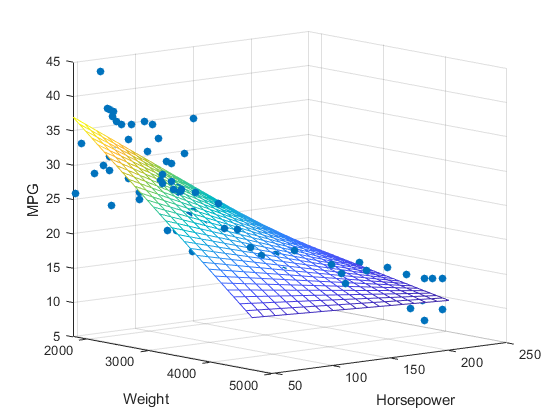
- 설명력이라고 하는 R^2은 데이터들이 직선상에 위치할수록, 즉 실제값과 예측값이 일치할수록 1에 가깝고 RMSE는 0이 된다.

# 12.3 분석 코드

In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
data2=pd.read_csv('../data/house_price.csv', encoding='utf-8')
X=data2[data2.columns[:-1]]
y=data2[['house_value']]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X, y, random_state=42)

from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(X_train)
X_scaled_train=scaler.transform(X_train)
X_scaled_test=scaler.transform(X_test)

In [2]:
import statsmodels.api as sm
X_train_new=sm.add_constant(X_train)
X_test_new=sm.add_constant(X_test)
X_train.head()

,housing_age,income,bedrooms,households,rooms
17235,12,2.0577,0.185449,3.945455,6.372727
14220,37,4.0000,0.171566,2.741497,6.363946
3280,24,5.8904,0.154485,2.969325,6.651840
15279,17,0.9393,0.241460,3.257256,4.518470
14727,16,2.7143,0.194977,2.679287,6.385301


In [3]:
multi_model=sm.OLS(y_train, X_train_new).fit()
print(multi_model.summary())

                            OLS Regression Results                            
Dep. Variable:            house_value   R-squared:                       0.571
Model:                            OLS   Adj. R-squared:                  0.571
Method:                 Least Squares   F-statistic:                     3525.
Date:                Tue, 23 Nov 2021   Prob (F-statistic):               0.00
Time:                        01:35:41   Log-Likelihood:            -1.6533e+05
No. Observations:               13266   AIC:                         3.307e+05
Df Residuals:                   13260   BIC:                         3.307e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -1.092e+05   9108.171    -11.985      

In [4]:
multi_model2=sm.OLS(y_test, X_test_new).fit()
print(multi_model2.summary())

                            OLS Regression Results                            
Dep. Variable:            house_value   R-squared:                       0.583
Model:                            OLS   Adj. R-squared:                  0.583
Method:                 Least Squares   F-statistic:                     1235.
Date:                Tue, 23 Nov 2021   Prob (F-statistic):               0.00
Time:                        01:35:41   Log-Likelihood:                -55064.
No. Observations:                4423   AIC:                         1.101e+05
Df Residuals:                    4417   BIC:                         1.102e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -9.383e+04   1.53e+04     -6.142      

In [5]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(X_scaled_train, y_train)

LinearRegression()

In [6]:
pred_train=model.predict(X_scaled_train)
pred_test=model.predict(X_scaled_test)
print("TrainSet Score : ", model.score(X_scaled_train, y_train))
print("testSet Score : ", model.score(X_scaled_test, y_test))

TrainSet Score :  0.5706921210926263
testSet Score :  0.5826083517811866


In [7]:
# RMSE
import numpy as np
from sklearn.metrics import mean_squared_error
RMSE_train=np.sqrt(mean_squared_error(y_train, pred_train))
RMSE_test=np.sqrt(mean_squared_error(y_test, pred_test))
print(f"TrainSet RMSE : {RMSE_train}\nTestSet RMSE : {RMSE_test}")

TrainSet RMSE : 62536.77389971208
TestSet RMSE : 61763.848825432055


In [8]:
#MAE
from sklearn.metrics import mean_absolute_error
MAE_train=mean_absolute_error(y_train, pred_train)
print(f"TrainSet MAE : {MAE_train}")

TrainSet MAE : 46648.61780873351


In [9]:
#MSE
from sklearn.metrics import mean_squared_error
MSE_train=mean_squared_error(y_train, pred_train)
print(f"TrainSet MAE : {MSE_train}")

TrainSet MAE : 3910848089.78371


In [10]:
#MAPE
def MAPE(y_test, y_pred):
    return np.mean(np.abs((y_test-y_pred)/y_test))*100
MAPE(y_test, pred_test)

house_value    30.33032
dtype: float64

In [11]:
#MPE
def MPE(y_test, y_pred):
    return np.mean((y_test-y_pred)/y_test*100)
MPE(y_test, pred_test)

house_value   -12.178049
dtype: float64